Plot ACFs

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 

import pickle
import numpy as np
import pandas as pd

from isttc.scripts.cfg_global import project_folder_path
from isttc.tau import func_single_exp_monkey

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
dataset_folder = project_folder_path + 'synthetic_dataset\\'
results_folder = project_folder_path + 'results\\synthetic\\results\\param_fr_alpha_tau\\'

save_fig = False

### Load data (spike trains and calculated acf's)

In [34]:
lv_df = pd.read_pickle(results_folder + 'lv_df.pkl')
summary_tau_df = pd.read_pickle(results_folder + 'summary_tau_all_long_df_all_units.pkl')

In [3]:
with open(results_folder + 'tau_pearsonr_trial_50ms_20lags_dict.pkl', "rb") as f:
    pearsonr_trial_avg_dict = pickle.load(f)

with open(results_folder + 'tau_isttc_trial_concat_50ms_20lags_dict.pkl', "rb") as f:
    sttc_trial_concat_dict = pickle.load(f)

with open(results_folder + 'tau_isttc_full_50ms_20lags_dict.pkl', "rb") as f:
    isttc_full_dict = pickle.load(f)

with open(results_folder + 'tau_acf_full_50ms_20lags_dict.pkl', "rb") as f:
    acf_full_dict = pickle.load(f)

print(f'len pearsonr_trial_avg_dict {len(pearsonr_trial_avg_dict)}')
print(f'len sttc_trial_concat_dict {len(sttc_trial_concat_dict)}')
print(f'len isttc_full_dict {len(isttc_full_dict)}')
print(f'len acf_full_dict {len(acf_full_dict)}')

len pearsonr_trial_avg_dict 100000
len sttc_trial_concat_dict 100000
len isttc_full_dict 100000
len acf_full_dict 100000


### Plot

In [5]:
color_acf_full = '#718190'
color_isttc_full = '#1ba9e2' 
color_pearson_trail_avg = '#f4a91c' 
color_sttc_trail_concat = '#955da2' 

colors = [color_acf_full, color_pearson_trail_avg, color_sttc_trail_concat]

#### ACFs

In [6]:
acf_full_dict[0]

{'taus': {'tau': np.float64(2.2178994948528157),
  'tau_lower': np.float64(2.119224323557929),
  'tau_upper': np.float64(2.3165746661477025),
  'fit_r_squared': 0.9983688249951346,
  'explained_var': 0.9983688249951346,
  'popt': array([1.07744127e+00, 2.21789949e+00, 9.23617009e-04]),
  'pcov': array([[ 3.10683507e-04, -6.62747657e-04,  6.97780985e-06],
         [-6.62747657e-04,  2.20595121e-03, -5.37909130e-05],
         [ 6.97780985e-06, -5.37909130e-05,  4.60988538e-06]]),
  'log_message': 'ok'},
 'acf': array([ 1.00000000e+00,  6.85447506e-01,  4.40920991e-01,  2.86195558e-01,
         1.72939296e-01,  1.12080550e-01,  6.62808050e-02,  4.00935381e-02,
         2.67535828e-02,  2.73342589e-02,  2.60284943e-02,  2.41372826e-02,
         1.09198159e-02,  7.66256087e-03,  8.27576179e-03, -6.73340124e-04,
        -2.75970089e-03, -8.84661692e-03, -8.36351537e-03, -4.92065341e-03,
         1.44944410e-03])}

In [44]:
summary_tau_df[summary_tau_df['unit_id'] == 39432]

,unit_id,tau,tau_lower,tau_upper,fit_r_squared,acf_decline,method,tau_ms,fr,alpha,tau_ms_true,tau_diff_abs,tau_diff_rel,ci_width,lv
39432,39432,0.104584,-73.384042,73.593209,-5.419270,True,acf_full,5.229187,0.033703,0.566852,124.292775,119.063588,95.792847,146.977251,2.250719
139432,39432,0.091836,-240.540219,240.723891,-0.494777,True,isttc_full,4.591805,0.033703,0.566852,124.292775,119.700970,96.305654,481.264110,2.250719
239432,39432,NaN,NaN,NaN,NaN,False,pearsonr_trial_avg,NaN,0.033703,0.566852,124.292775,NaN,NaN,NaN,2.250719
339432,39432,0.076500,-1493.855828,1494.008827,0.000000,True,sttc_trial_concat,3.824976,0.033703,0.566852,124.292775,120.467799,96.922608,2987.864656,2.250719


In [41]:
summary_tau_df.sort_values(by='fit_r_squared')

,unit_id,tau,tau_lower,tau_upper,fit_r_squared,acf_decline,method,tau_ms,fr,alpha,tau_ms_true,tau_diff_abs,tau_diff_rel,ci_width,lv
245022,45022,0.070171,-1.080450,1.220791,-1.119546e+19,True,pearsonr_trial_avg,3.508537,1.256924,0.745089,253.915731,250.407195,98.618228,2.301241,1.459532
20272,20272,0.108419,-57.224941,57.441779,-2.118450e+01,True,acf_full,5.420947,0.031157,0.877233,243.666818,238.245870,97.775262,114.666719,1.529041
88426,88426,0.108419,-57.220813,57.437651,-2.118450e+01,True,acf_full,5.420947,0.031202,0.866238,214.001833,208.580886,97.466869,114.658464,3.000000
55789,55789,0.104584,-73.365580,73.574748,-5.419270e+00,True,acf_full,5.229187,0.057500,0.846262,210.146814,204.917627,97.511651,146.940328,2.811971
39432,39432,0.104584,-73.384042,73.593209,-5.419270e+00,True,acf_full,5.229187,0.033703,0.566852,124.292775,119.063588,95.792847,146.977251,2.250719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299979,99979,NaN,NaN,NaN,NaN,True,pearsonr_trial_avg,NaN,3.533323,0.826369,86.938488,NaN,NaN,NaN,1.441412
299981,99981,NaN,NaN,NaN,NaN,False,pearsonr_trial_avg,NaN,0.189062,0.285811,66.666530,NaN,NaN,NaN,1.612335
299982,99982,NaN,NaN,NaN,NaN,False,pearsonr_trial_avg,NaN,0.157186,0.118131,66.586425,NaN,NaN,NaN,1.301736
299984,99984,NaN,NaN,NaN,NaN,False,pearsonr_trial_avg,NaN,0.039075,0.210591,243.583679,NaN,NaN,NaN,1.606658


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


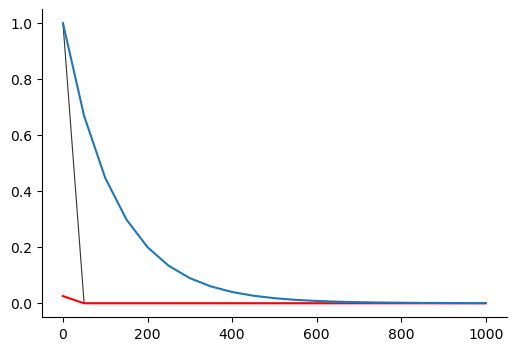

In [48]:
n_lags = 20
t = np.linspace(0, n_lags, n_lags+1).astype(int)
print(t)

fig, axes = plt.subplots(1, 1, figsize=(6, 4))

for k, v in list(acf_full_dict.items())[39432:39433]:
    axes.plot(lags, v['acf'], lw=0.8, color='k', alpha=0.8)
    axes.plot(lags, func_single_exp_monkey(t, *v['taus']['popt']), color='red')

idx = 0
alpha = summary_tau_df[summary_tau_df['unit_id'] == 39432]['alpha'].values[0] 
tau_ms = summary_tau_df[summary_tau_df['unit_id'] == 39432]['tau_ms_true'].values[0]      
firing_rate = 5.0    # Hz, not needed for normalized ACF
lags = np.linspace(0, 1000, 21)  
tau_acf = tau_ms  # with your parametrization
acf_analytical = np.exp(-np.abs(lags) / tau_acf)
axes.plot(lags, acf_analytical)

sns.despine()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


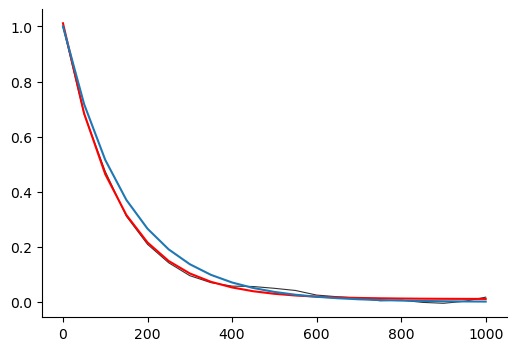

In [28]:
n_lags = 20
t = np.linspace(0, n_lags, n_lags+1).astype(int)
print(t)

fig, axes = plt.subplots(1, 1, figsize=(6, 4))

for k, v in list(isttc_full_dict.items())[:1]:
    axes.plot(lags, v['acf'], lw=0.8, color='k', alpha=0.8)
    axes.plot(lags, func_single_exp_monkey(t, *v['taus']['popt']), color='red')

idx = 0
alpha = summary_tau_df[summary_tau_df['unit_id'] == idx]['alpha'].values[0] 
tau_ms = summary_tau_df[summary_tau_df['unit_id'] == idx]['tau_ms_true'].values[0]      
firing_rate = 5.0    # Hz, not needed for normalized ACF
lags = np.linspace(0, 1000, 21)  
tau_acf = tau_ms  # with your parametrization
acf_analytical = np.exp(-np.abs(lags) / tau_acf)
axes.plot(lags, acf_analytical)

sns.despine()

In [ ]:
for unit_id in range(100):

    fig, axes = plt.subplots(1,1)
    
    axes.plot(abctau_acf_dict[unit_id]['acf_cc'], color=color_abctau_cc, label='abctau_cc')
    axes.plot(pearsonr_trial_avg_dict[unit_id]['acf'][0], color=color_pearson_trail_avg, label='pearsonr')
    axes.plot(sttc_trial_concat_dict[unit_id]['acf'][0], color=color_sttc_trail_concat, label='sttc_concat')
    axes.plot(acf_full_dict[unit_id]['acf'], color=color_acf_full, label='acf')
    axes.plot(isttc_full_dict[unit_id]['acf'], color=color_isttc_full, label='isttc')
    
    axes.axhline(y=0, lw=0.5, c='k')
    
    axes.legend(frameon=False)
    
    sns.despine()

    # save without showing
    fig.savefig(fig_folder + f"acf_plot_unit_{unit_id}.png", dpi=300, bbox_inches='tight')
    plt.close(fig)  